# Dynamic filter MNIST classification

Note: This notebook is designed to run with GPU runtime.

Import modules and set random seeds.

In [ ]:
import os, random
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

random.seed(20230515)
np.random.seed(20190825)
tf.random.set_seed(20190825)

plt.rcParams.update({'font.size': 10})

Download the MNIST dataset and store into NumPy arrays.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                    (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                    (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

Define the CNN model with a single convolutional filter layer.

**2 段目の畳み込み層を追加します。**

一例として、フィルターサイズ 5 × 5、フィルター数 32 個の畳み込み層を追加します。

In [ ]:
model = models.Sequential(name='CNN_model')
model.add(layers.Input(shape=(784,), name='input'))
model.add(layers.Reshape((28, 28, 1), name='reshape'))
model.add(layers.Conv2D(16, (5, 5), padding='same', strides=2,
                        use_bias=True, activation='relu',
                        name='conv_filter'))
#### 2 段目の畳み込み層を追加
model.add(layers.Conv2D(32, (5, 5), padding='same', strides=2,
                        use_bias=True, activation='relu',
                        name='conv_filter2'))
####
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu', name='feedforward'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_filter (Conv2D)            │ (None, 14, 14, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_filter2 (Conv2D)           │ (None, 7, 7, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feedforward (Dense)             │ (None, 1024)           │     1,606,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,630,154 (6.22 MB)

 Trainable params: 1,630,154 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model using the Adam optimizer, and the categorical crossentroy as a loss function.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

Train the model. It achieves around 98 ~ 99% accuracy.

**テストデータに対する正解率はわずかに向上したようですが、顕著な変化とは言えません。**

すでに 99% に近い精度をさらに向上するのは、一般的にかなり困難な作業です。

より複雑な画像データの分類タスクであれば、畳み込み層の多層化の効果は、より顕著に現れると考えられます。


In [ ]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - acc: 0.8636 - loss: 0.4485 - val_acc: 0.9792 - val_loss: 0.0671
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9801 - loss: 0.0652 - val_acc: 0.9811 - val_loss: 0.0529
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9866 - loss: 0.0428 - val_acc: 0.9848 - val_loss: 0.0420
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9915 - loss: 0.0282 - val_acc: 0.9834 - val_loss: 0.0491
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9938 - loss: 0.0204 - val_acc: 0.9850 - val_loss: 0.0521
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9944 - loss: 0.0173 - val_acc: 0.9890 - val_loss: 0.0393
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9961 - loss: 0.0117 - val_acc: 0.9862 - val_loss: 0.0513
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9965 - loss: 0.0107 - val_acc: 0.9871 - val_loss: 0.0501
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - a

Plot charts for the accuracy and loss values.

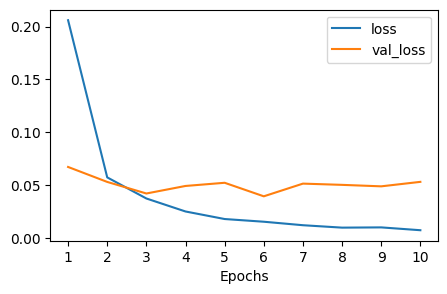

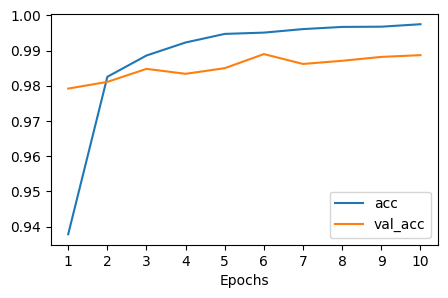

In [ ]:
df = DataFrame({'loss': history.history['loss'],
                'val_loss': history.history['val_loss']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)

df = DataFrame({'acc': history.history['acc'],
                'val_acc': history.history['val_acc']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)

Apply the trained filters to the MNIST dataset.

In [ ]:
model2 = models.Model(model.inputs[0],
                      model.get_layer('conv_filter').output,
                      name='conv_filter_output')
model2.summary()

Model: "conv_filter_output"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_filter (Conv2D)            │ (None, 14, 14, 16)     │           416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416 (1.62 KB)

 Trainable params: 416 (1.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
labels = [np.argmax(label) for label in test_labels]
sample_images = np.array([test_images[labels.index(i)] for i in range(10)])
conv_output = model2.predict(sample_images, verbose=0)

filter_vals = model.get_layer('conv_filter').get_weights()[0]

Show images after applying the convolutional filters.

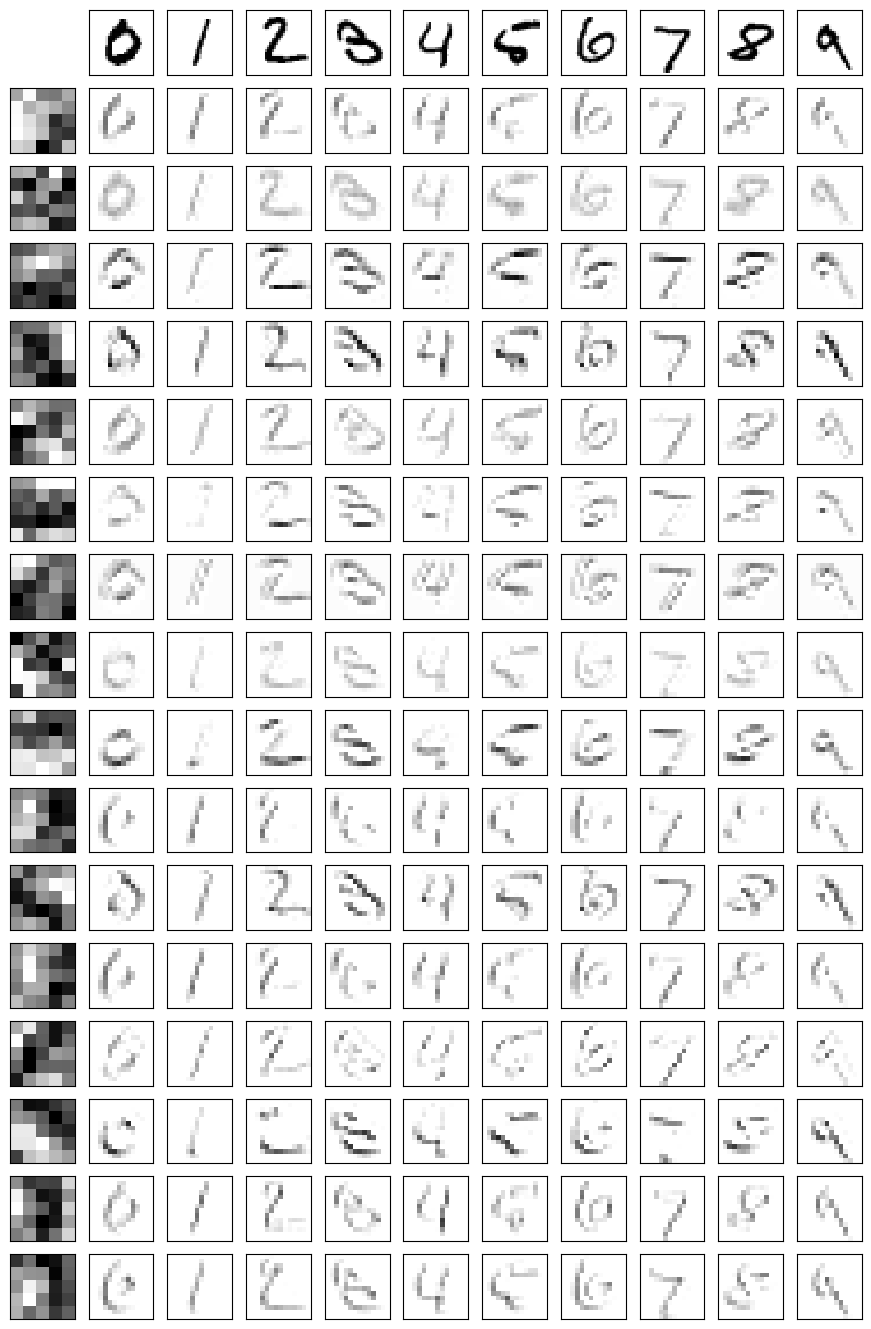

In [ ]:
num_filters = filter_vals.shape[-1]
fig = plt.figure(figsize=(11, num_filters+1))
v_max = np.max(conv_output)

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 11, 11*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i], interpolation='none',
                   cmap=plt.cm.gray_r)

for i in range(10):
    subplot = fig.add_subplot(num_filters+1, 11, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(sample_images[i].reshape((28, 28)), interpolation='none',
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 11, 11*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_output[i, :, :, f], interpolation='none',
                       vmin=0, vmax=v_max, cmap=plt.cm.gray_r)

In [ ]:
model3 = models.Model(model.inputs[0],
                      model.get_layer('conv_filter2').output,
                      name='conv_filter_output')
model3.summary()

Model: "conv_filter_output"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_filter (Conv2D)            │ (None, 14, 14, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_filter2 (Conv2D)           │ (None, 7, 7, 32)       │        12,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,248 (51.75 KB)

 Trainable params: 13,248 (51.75 KB)

 Non-trainable params: 0 (0.00 B)

**2 層目の畳み込みフィルターからの出力結果を追加で画像表示します。**

画像サイズがさらに半分の 7 × 7 になっていることがわかります。

In [ ]:
labels = [np.argmax(label) for label in test_labels]
sample_images = np.array([test_images[labels.index(i)] for i in range(10)])
conv_output = model3.predict(sample_images, verbose=0)

filter_vals = model.get_layer('conv_filter2').get_weights()[0]

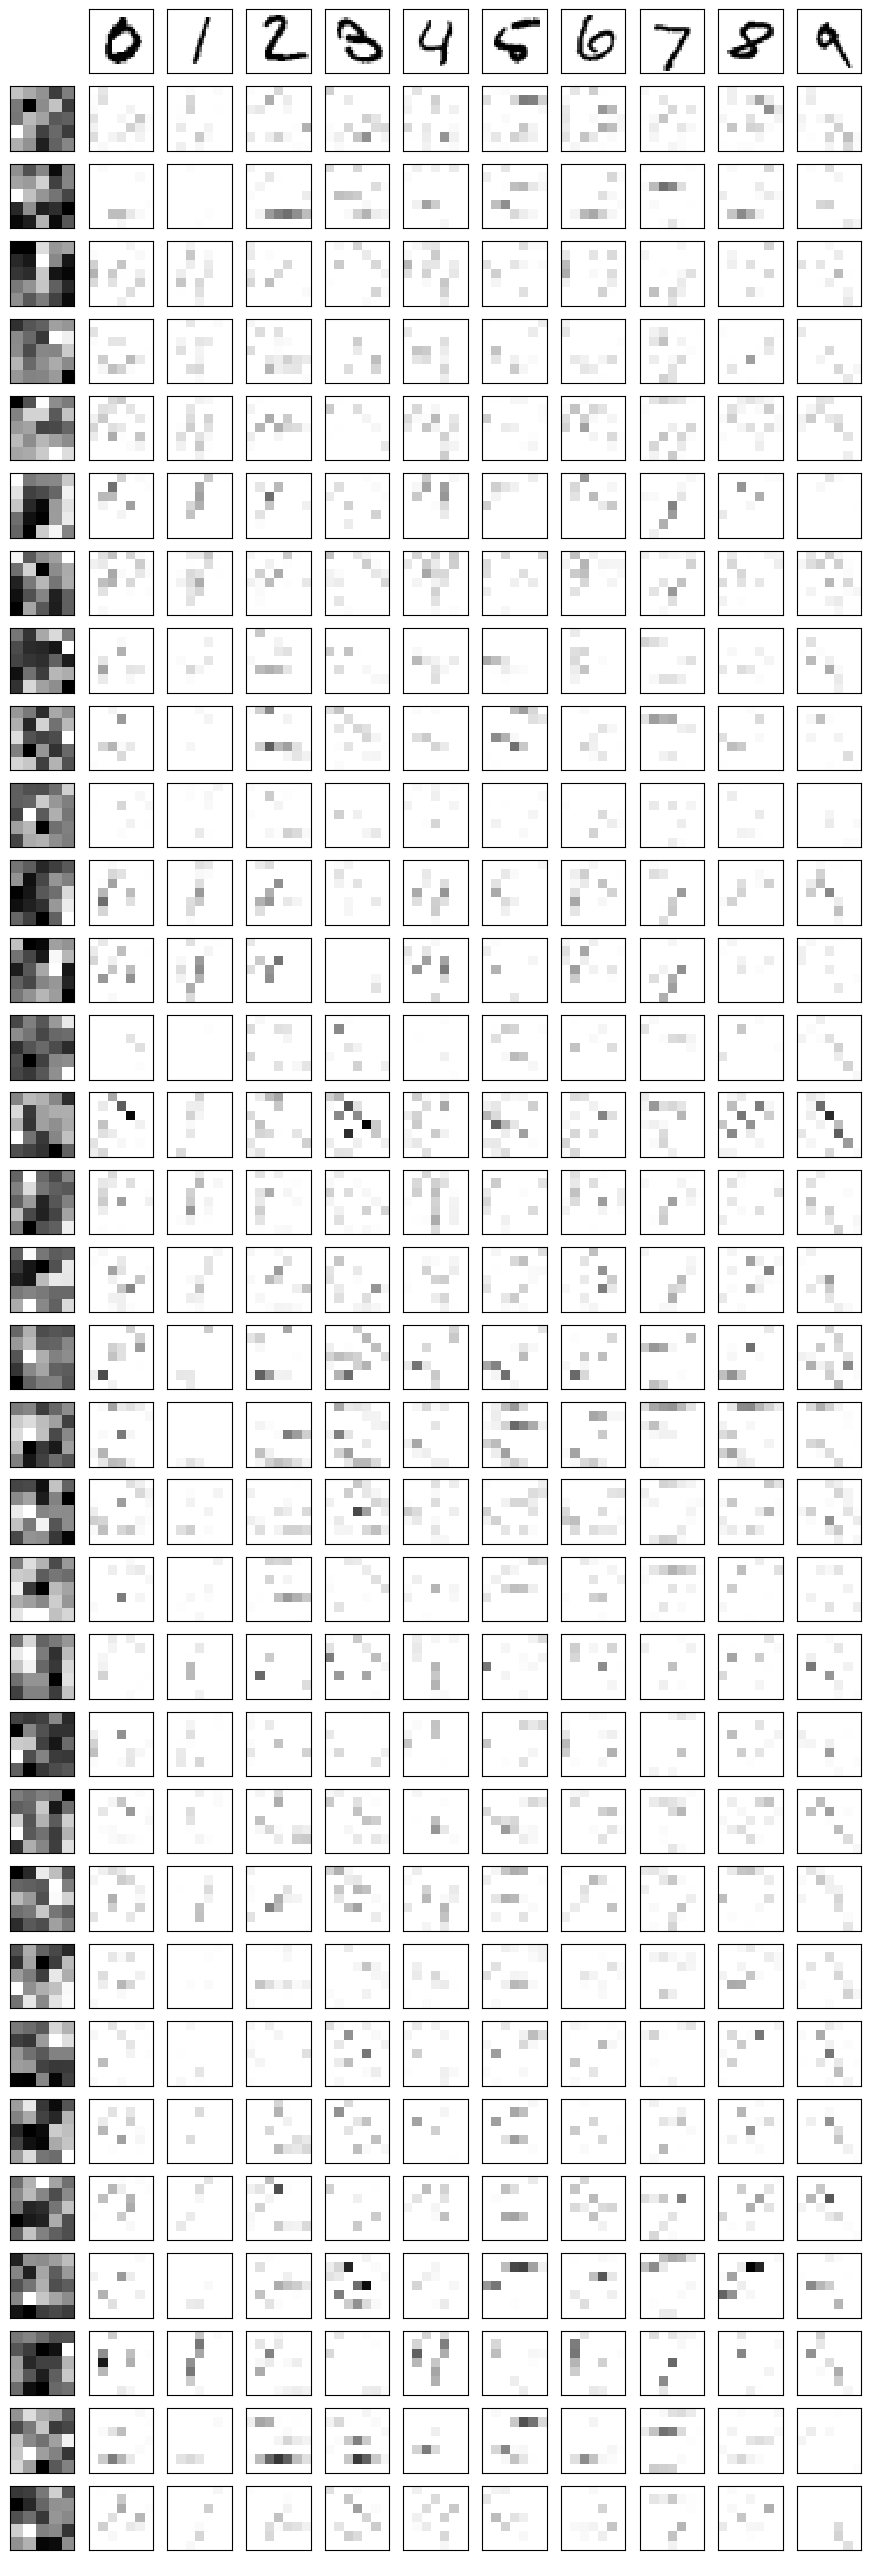

In [ ]:
num_filters = filter_vals.shape[-1]
fig = plt.figure(figsize=(11, num_filters+1))
v_max = np.max(conv_output)

for i in range(num_filters):
    subplot = fig.add_subplot(num_filters+1, 11, 11*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i], interpolation='none',
                   cmap=plt.cm.gray_r)

for i in range(10):
    subplot = fig.add_subplot(num_filters+1, 11, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(sample_images[i].reshape((28, 28)), interpolation='none',
                   vmin=0, vmax=1, cmap=plt.cm.gray_r)

    for f in range(num_filters):
        subplot = fig.add_subplot(num_filters+1, 11, 11*(f+1)+i+2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(conv_output[i, :, :, f], interpolation='none',
                       vmin=0, vmax=v_max, cmap=plt.cm.gray_r)